In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd
import numpy as np
import cv2
import os
import re

<h1>Store DataSet</h1>

In [2]:
folder = '../UTKFace/'

In [30]:
scaler = MinMaxScaler()

In [3]:
def store_images_path(folder):
    df = pd.DataFrame(columns=['Path','Age'])
    for file in os.listdir(folder):
        features = file.split('_')
        df = df.append({'Path':os.path.join(folder,file),'Age':int(features[0])},ignore_index=True)
    return df

In [4]:
images = store_images_path(folder=folder)

In [5]:
images['Age'] = images['Age'].astype('Int64')

In [6]:
images.describe()

Age
count  23708.000000
mean      33.303484
std       19.886112
min        1.000000
25%       23.000000
50%       29.000000
75%       45.000000
max      116.000000

In [7]:
images.to_csv('../Ages.csv',index=False)

<h1>Store Feature Matrix</h1>

In [8]:
def load_image_and_resize_vector(df):
    images = []
    for path in df['Path']:
        img = cv2.imread(path)
        resize_image = cv2.resize(img, (32,32))
        images.append(resize_image)
    return np.array(images)


In [9]:
def Compute_Feature_vector(images):
    features = np.array([images[0].flatten()])
    for x in range(1,len(images)):
        features = np.append(features, [images[x].flatten()], axis=0)
    print(f'Shape: {features.shape}')
    return features


In [10]:
image_vector = load_image_and_resize_vector(images)

In [11]:
feature_matrix = Compute_Feature_vector(image_vector)

Shape: (23708, 3072)


In [31]:
nor_matrix = scaler.fit_transform(feature_matrix)

In [40]:
scaler_file = '../scaler'

with open(scaler_file,'wb') as handle:
    pkl.dump(scaler,handle,protocol=pkl.HIGHEST_PROTOCOL)

In [33]:
file_name = '../Compressed_data_age_1'

with open(file_name, 'wb') as handle:
    pkl.dump(nor_matrix, handle, protocol=pkl.HIGHEST_PROTOCOL)

<h1>Load Dataset and feature Matrix</h1>

In [3]:
images = pd.read_csv('../Ages.csv')
# images = pd.read_csv('../../Assignment 1/task1/Data.csv')

In [4]:
file_name = '../Compressed_data_age_1'
# file_name = '../../Assignment 1/task1/Compressed_data_1'
with open(file_name, 'rb') as handle:
    feature_matrix = pkl.load(handle)
print(feature_matrix.shape)

(23708, 3072)


In [5]:
X_train,X_test,y_train,y_test = train_test_split(feature_matrix,images['Age'],test_size=0.2)

In [6]:
X_train.shape,X_test.shape

((18966, 3072), (4742, 3072))

In [7]:
reg = LinearRegression()

In [8]:
reg.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = reg.predict(X_test)

In [10]:
mse = MSE(y_test,y_pred)
rmse = np.sqrt(mse) 

In [26]:
# model_file = 'Linear_Reg_Images_UTKFace.sav'
model_file = 'Linear_Reg_Images_my_data.sav'
pkl.dump(reg,open(model_file,'wb'))

In [27]:
# model_file = 'Linear_Reg_Images_UTKFace.sav'
model_file = 'Linear_Reg_Images_my_data.sav'
reg = pkl.load(open(model_file,'rb'))

<h1 style='text-align:center'>Model evaluation</h1>

In [11]:
print(f'Parameters: {reg.get_params()}')
print(f'Coefficient: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')
print(f'Mean squared error {mse}')
print(f'Root mean squared error: {rmse}')

Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}
Coefficient: [  8.00206802 -16.36094617  10.49282066 ...   2.06788536  -4.48354658
  -0.82071432]
Intercept: 34.33237527301383
Mean squared error 187.09651122612084
Root mean squared error: 13.67832267590295


In [28]:
X_test_array_index = np.arange(1,X_test.shape[0]+1)
X_train_array_index = np.arange(1,X_train.shape[0]+1)
X_test_array_index.shape,y_test.shape

((13,), (13,))

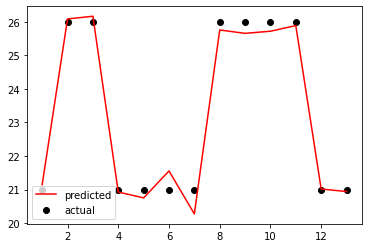

In [29]:
plt.scatter(X_test_array_index,y_test,color='black',label='actual')
plt.plot(X_test_array_index,y_pred,color='red',label='predicted')
plt.legend()
plt.plot()
plt.show()